In [1]:
import pandas as pd
import re

In [2]:
data_p = pd.read_csv("Price.csv")
data_b = pd.read_csv("B&CR.csv")

In [3]:
col = "Material Number"
co = "Material Description"
data_bc = data_b.rename(columns = {col:co})

In [4]:
data_bc

,Material Description,Bottle,Crate
0,B&CR: 1000RB Amber & 1L Brown Crate,Bottle: 1000RB Amber,Crate: 1L Brown
1,B&CR: 1000RB Amber & 1L Brown Crate,Crate: 1L Brown,Crate: 1L Brown
2,B&CR: 330RB Amber & Brown Crate,Bottle: 330RB Amber Uno,Crate: Brown Pint
3,B&CR: 330RB Amber & Brown Crate,Crate: Brown Pint,Crate: Brown Pint
4,B&CR: 330RB Flint & Blue Crate,Bottle: 330RB Flint Uno,Crate: Blue Pint
...,...,...,...
69,Bottle: 750RB Amber Calabash,Bottle: 750RB Amber Calabash,NaN
70,CRATE: SCRAP 750ml RB Plastic Brown,NaN,Crate: Brown Quart
71,CRATE: SCRAP RB Plastic Red,NaN,Crate: Red Quart
72,Bottle: 660RB Budweiser,Bottle: 660RB Budweiser,NaN


In [5]:
data_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Plant                 519 non-null    object
 1   Material Description  519 non-null    object
 2    Price per case       519 non-null    object
dtypes: object(3)
memory usage: 12.3+ KB


In [6]:
redundant_rows = data_p.duplicated(subset=['Material Description'])

In [7]:
fil_df = data_p[~redundant_rows]

In [8]:
fil_df

,Plant,Material Description,Price per case
0,AA,B&CR: 750RB Amber Calabash & Brown Crate,16.0359
7,AA,B&CR: 750RB Green Elite & Red Crate,16.9192
14,AA,B&CR: 660RB Green Lite & Red Crate,16.9192
21,AA,B&CR: 660RB Flint Diva & Blue Crate,16.9192
28,AA,XYX B&CR: 375RB PINT PLASTIC BROWN,23.9358
...,...,...,...
507,AA,Keg: 20L Leffe Blond Import Empty,263.2608
511,AA,Keg: 20L Hoegaarden White Import Empty,263.2608
515,AG,XXX Bottle: 660NRB Budweiser,8.8775
516,AG,B&CR: 660NRB Budweiser & Black Crate,16.9192


In [9]:
mer = pd.merge(fil_df,data_bc,on = "Material Description",how = "inner")

In [10]:
mer

,Plant,Material Description,Price per case,Bottle,Crate
0,AA,B&CR: 750RB Amber Calabash & Brown Crate,16.0359,Bottle: 750RB Amber Calabash,Crate: Brown Quart
1,AA,B&CR: 750RB Amber Calabash & Brown Crate,16.0359,Crate: Brown Quart,Crate: Brown Quart
2,AA,B&CR: 750RB Green Elite & Red Crate,16.9192,Bottle: 750ml RB Green Elite,Crate: Red Quart
3,AA,B&CR: 750RB Green Elite & Red Crate,16.9192,Crate: Red Quart,Crate: Red Quart
4,AA,B&CR: 660RB Green Lite & Red Crate,16.9192,Bottle: 660RB Green Lite,Crate: Red Quart
...,...,...,...,...,...
69,AA,B&CR: 660RB Green & 660ML Yellow Crate,25.5442,Crate: Yellow Quart,Crate: Yellow Quart
70,AG,B&CR: 660NRB Budweiser & Black Crate,16.9192,Bottle: Budweiser 660ml NRB,Crate: Black Quart
71,AG,B&CR: 660NRB Budweiser & Black Crate,16.9192,Crate: Black Quart,Crate: Black Quart
72,AG,B&CR: CLT 660ml NRB BIG,29.6525,Bottle: CLT 660ml NRB BIG,Crate: Red Quart


In [11]:
def extract_integers_from_string(string):
    integers = re.findall(r'\d+', string)
    return [int(i) for i in integers]
column_name = 'Bottle'
df = mer
for i, element in enumerate(df[column_name]):
    integers = extract_integers_from_string(str(element))
    df.loc[i, column_name] = integers


In [12]:
mer.shape

(74, 5)

In [13]:
import matplotlib.pyplot as plt

In [14]:
redundant_rows = mer.duplicated(subset=['Material Description'])

In [15]:
filtered_df = mer[~redundant_rows]

In [16]:
filtered_df

,Plant,Material Description,Price per case,Bottle,Crate
0,AA,B&CR: 750RB Amber Calabash & Brown Crate,16.0359,[750],Crate: Brown Quart
2,AA,B&CR: 750RB Green Elite & Red Crate,16.9192,[750],Crate: Red Quart
4,AA,B&CR: 660RB Green Lite & Red Crate,16.9192,[660],Crate: Red Quart
6,AA,B&CR: 660RB Flint Diva & Blue Crate,16.9192,[660],Crate: Blue Quart
8,AA,B&CR: Mix Quart & Red Crate,16.9192,[660],Crate: Red Quart
10,AA,XXXB&CR: 660RB Flint MGD & Yellow Crate,16.9192,[660],Bottle: 660RB Flint MGD
12,AA,B&CR: 660RB Flint Bella & Grey Crate,16.9192,[660],Crate: Grey Quart
14,AA,Keg: 30L Empty,263.2608,[],Keg: 30L Empty
15,AA,Keg: 50L Empty,263.2608,[],Keg: 50L Empty
16,AA,Crate: Brown Quart,8.1442,[],Crate: Brown Quart


In [17]:
def extract_integers_from_string(string):
    integers = re.findall(r'\d+', string)
    r = [int(i) for i in integers]
    if r:
        return r[0]
    else:
        return 0




column_name = 'Bottle'
df = mer
for i, element in enumerate(df[column_name]):
    integers = extract_integers_from_string(str(element))
    df.loc[i, column_name] = integers


In [18]:
mer

,Plant,Material Description,Price per case,Bottle,Crate
0,AA,B&CR: 750RB Amber Calabash & Brown Crate,16.0359,750,Crate: Brown Quart
1,AA,B&CR: 750RB Amber Calabash & Brown Crate,16.0359,0,Crate: Brown Quart
2,AA,B&CR: 750RB Green Elite & Red Crate,16.9192,750,Crate: Red Quart
3,AA,B&CR: 750RB Green Elite & Red Crate,16.9192,0,Crate: Red Quart
4,AA,B&CR: 660RB Green Lite & Red Crate,16.9192,660,Crate: Red Quart
...,...,...,...,...,...
69,AA,B&CR: 660RB Green & 660ML Yellow Crate,25.5442,0,Crate: Yellow Quart
70,AG,B&CR: 660NRB Budweiser & Black Crate,16.9192,660,Crate: Black Quart
71,AG,B&CR: 660NRB Budweiser & Black Crate,16.9192,0,Crate: Black Quart
72,AG,B&CR: CLT 660ml NRB BIG,29.6525,660,Crate: Red Quart


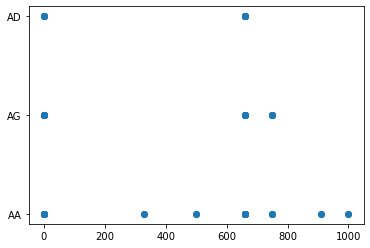

In [19]:
x = mer['Bottle']
y = mer['Plant']
plt.scatter(x,y)
plt.show()